In [5]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

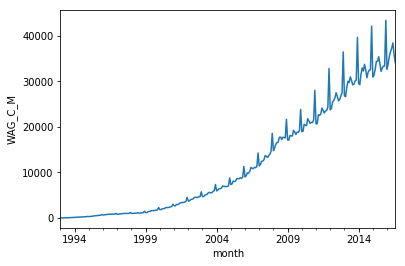

In [19]:
wag = pd.read_csv('data/WAG_C_M.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
plt.figure()
wag.WAG_C_M.plot()
plt.ylabel('WAG_C_M');

# Проверка стационарности критерием Дики-Фуллера

Dickey — Fuller test: p=0.991850


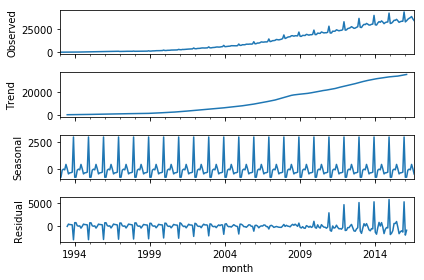

In [26]:
plt.figure()
sm.tsa.seasonal_decompose(wag.WAG_C_M).plot()
print("Dickey — Fuller test: p=%f" % sm.tsa.stattools.adfuller(wag.WAG_C_M)[1]);

# Стабилизация дисперсии

Optimal parametrs for variance stabilization: 0.263202
Dickey — Fuller test:  p=0.696899


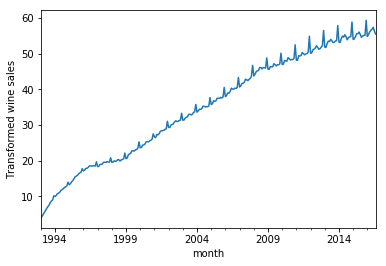

In [29]:
wag['wag_box'], lmbda = stats.boxcox(wag.WAG_C_M)
plt.figure()
wag.wag_box.plot()
plt.ylabel(u'Transformed wine sales')
print("Optimal parametrs for variance stabilization: %f" % lmbda)
print("Dickey — Fuller test:  p=%f" % sm.tsa.stattools.adfuller(wag.wag_box)[1])

# Стационарность

##  сезонное дифференцирование

Dickey — Fuller test: p=0.014697


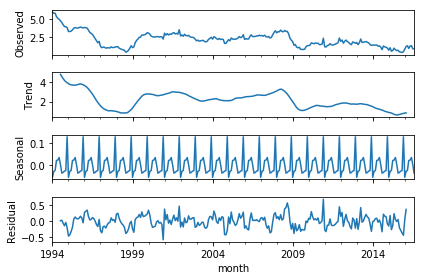

In [31]:
wag['wag_box_diff'] = wag.wag_box - wag.wag_box.shift(12)
plt.figure(figsize())
sm.tsa.seasonal_decompose(wag.wag_box_diff[12:]).plot()
print("Dickey — Fuller test: p=%f" % sm.tsa.stattools.adfuller(wag.wag_box_diff[12:])[1])

## обычное дифференцирование

Dickey — Fuller test:  p=0.000000


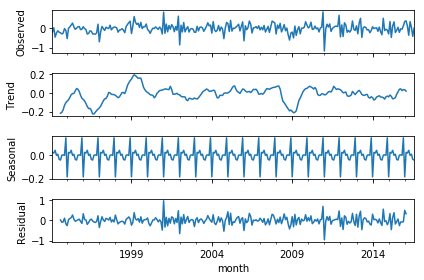

In [34]:
wag['wag_box_diff2'] = wag.wag_box_diff - wag.wag_box_diff.shift(1)
plt.figure(figsize = (15,8))
sm.tsa.seasonal_decompose(wag.wag_box_diff2[13:]).plot()   
print("Dickey — Fuller test:  p=%f" % sm.tsa.stattools.adfuller(wag.wag_box_diff2[13:])[1])

# ARIMA

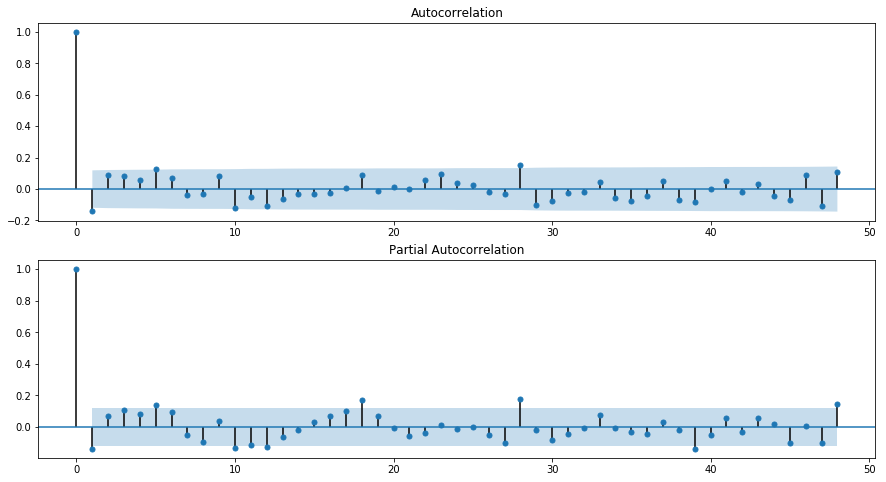

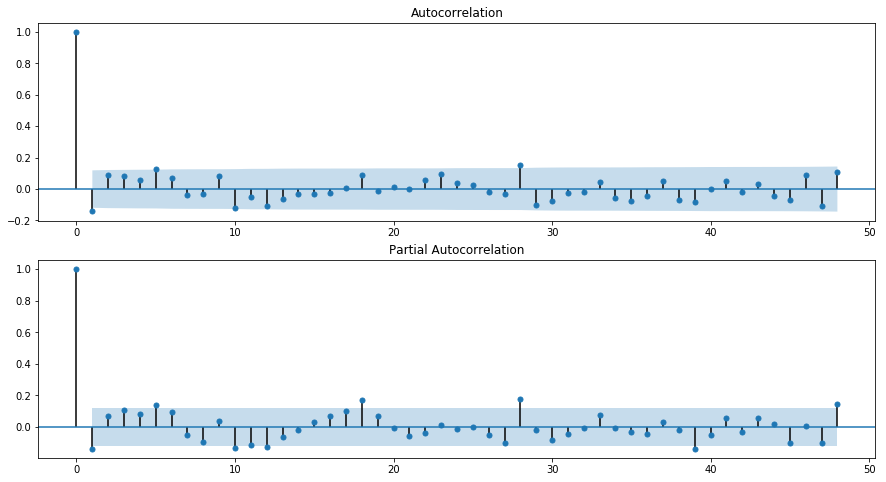

In [35]:
plt.figure(figsize = (15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(wag.wag_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(wag.wag_box_diff2[13:].values.squeeze(), lags=48, ax=ax)